In [1]:
# Import libraries
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

In [3]:
# Downloaded .csv file from link above and stored it as a database
conn = sqlite3.connect('hotel_bookings.db')
print("Opened database successfully")

cur = conn.cursor()

Opened database successfully


In [4]:
# Select everything from the table
q1 = "SELECT * FROM hotel_bookings;"

In [5]:
data1 = cur.execute(q1)
data1 = cur.fetchall()

col = ['hotel','is_canceled','lead_time','arrival_date_year','arrival_date_month','arrival_date_week_number',
           'arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adults',
           'children','babies','meal','country','market_segment','distribution_channel','is_repeated_guest',
           'previous_cancellations','previuos_booking_not_canceled','reserved_room_type','assigned_room_type',
           'booking_changes','deposit_type','agent','company','days_in_waiting_list','customer_type','adr',
           'required_car_parking_spaces','total_of_special_requests','reservation_status','reservation_status_date']
df1 = pd.DataFrame(data1,columns = col)
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,None,None,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,None,None,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,None,None,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304,None,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,None,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
# Find the number of null values 
q2 = """SELECT SUM(case when hotel is null then 1 else 0 end),
        SUM(case when is_canceled is null then 1 else 0 end), 
        SUM(case when lead_time is null then 1 else 0 end), 
        SUM(case when arrival_date_year is null then 1 else 0 end),
        SUM(case when arrival_date_month is null then 1 else 0 end),
        SUM(case when arrival_date_week_number is null then 1 else 0 end),
        SUM(case when arrival_date_day_of_month is null then 1 else 0 end),
        SUM(case when stays_in_weekend_nights is null then 1 else 0 end),
        SUM(case when stays_in_week_nights is null then 1 else 0 end),
        SUM(case when adults is null then 1 else 0 end),
        SUM(case when children is null then 1 else 0 end),
        SUM(case when babies is null then 1 else 0 end),
        SUM(case when meal is null then 1 else 0 end),
        SUM(case when country is null then 1 else 0 end),
        SUM(case when market_segment is null then 1 else 0 end),
        SUM(case when distribution_channel is null then 1 else 0 end),
        SUM(case when is_repeated_guest is null then 1 else 0 end),
        SUM(case when previous_cancellations is null then 1 else 0 end),
        SUM(case when previuos_booking_not_canceled is null then 1 else 0 end),
        SUM(case when reserved_room_type is null then 1 else 0 end),
        SUM(case when assigned_room_type is null then 1 else 0 end),
        SUM(case when booking_changes is null then 1 else 0 end),
        SUM(case when deposit_type is null then 1 else 0 end),
        SUM(case when agent is null then 1 else 0 end),
        SUM(case when company is null then 1 else 0 end),
        SUM(case when days_in_waiting_list is null then 1 else 0 end),
        SUM(case when customer_type is null then 1 else 0 end),
        SUM(case when adr is null then 1 else 0 end),
        SUM(case when required_car_parking_spaces is null then 1 else 0 end),
        SUM(case when total_of_special_requests is null then 1 else 0 end),
        SUM(case when reservation_status is null then 1 else 0 end),
        SUM(case when reservation_status_date is null then 1 else 0 end)
        FROM hotel_bookings;"""

In [7]:
data2 = cur.execute(q2)
data2 = cur.fetchall()

df2 = pd.DataFrame(data2,columns=col)
df2 = df2.T
df2.columns = ['Null_Values']
df2

,Null_Values
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


Note :
- There are 3 columns that contain null values.

In [8]:
# Find the number of canceled bookings
q3 = """SELECT 
        SUM(is_canceled),
        COUNT(*),
        ROUND(SUM(is_canceled)*100.0/COUNT(*),2)
        FROM hotel_bookings;"""

In [9]:
data3 = cur.execute(q3)
data3 = cur.fetchall()

col3 = ['Canceled_B','Total_B','%_of_Total']
df3 = pd.DataFrame(data3,columns=col3)
df3 

,Canceled_B,Total_B,%_of_Total
0,44224,119389,37.04


Note :
- The number of canceled bookings is 37% of total.

In [10]:
# Find the number of canceled bookings depending on type of hotel
q4 = """SELECT hotel,
        SUM(is_canceled),
        COUNT(*),
        ROUND(SUM(is_canceled)*100/COUNT(*),2)
        FROM hotel_bookings
        GROUP BY hotel;"""

In [11]:
data4 = cur.execute(q4)
data4 = cur.fetchall()

col4 = ['Hotel','Canceled_B','Total_B','%ofTotal']
df4 = pd.DataFrame(data4,columns=col4)
df4

,Hotel,Canceled_B,Total_B,%ofTotal
0,City Hotel,33102,79330,41.0
1,Resort Hotel,11122,40059,27.0


Note : 
- The percentage of canceled booklings of City hotel is 14 points larger than Resort hotel.

In [12]:
# Find the most popular month
q5 = """SELECT arrival_date_month,
        COUNT(*)
        FROM hotel_bookings
        GROUP BY arrival_date_month
        ORDER BY COUNT(*) DESC"""

In [13]:
data5 = cur.execute(q5)
data5 = cur.fetchall()

col5 = ['Arrival_Month','Total_B']
df5 = pd.DataFrame(data5,columns=col5)
df5

,Arrival_Month,Total_B
0,August,13877
1,July,12661
2,May,11791
3,October,11160
4,April,11089
5,June,10938
6,September,10508
7,March,9794
8,February,8068
9,November,6794


Note : 
- The most booked month is August.

In [14]:
q51 = """SELECT arrival_date_year, arrival_date_month,
        COUNT(*)
        FROM hotel_bookings
        GROUP BY arrival_date_year,arrival_date_month
        ORDER BY COUNT(*) DESC"""

In [15]:
data51 = cur.execute(q51)
data51 = cur.fetchall()

col51 = ['Arrival_Year','Arrival_Month','Total_B']
df51 = pd.DataFrame(data51,columns=col51)
df51.head()

,Arrival_Year,Arrival_Month,Total_B
0,2017,May,6313
1,2016,October,6203
2,2017,April,5661
3,2017,June,5647
4,2016,May,5478


In [16]:
monthorder = ["January","February","March","April","May","June",
              "July","August","September","October","November","December"]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

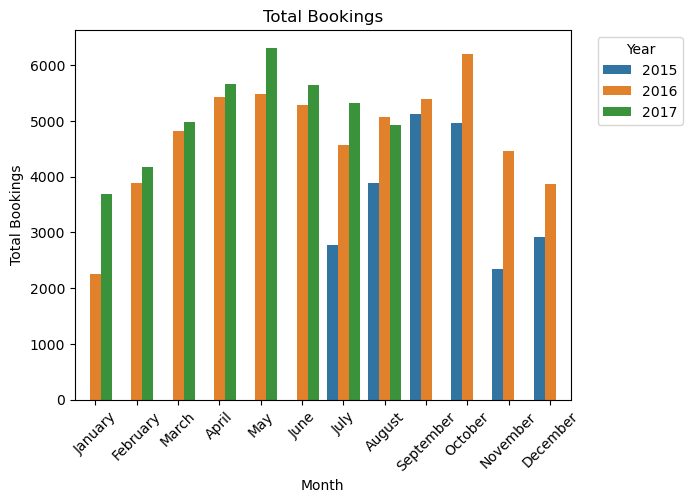

In [17]:
plot51 = sns.barplot(x='Arrival_Month',y='Total_B',hue='Arrival_Year',
            order = monthorder, data=df51)
plt.title('Total Bookings')
plt.xlabel('Month')
plt.ylabel('Total Bookings')
plt.legend(title='Year', ncol=1,bbox_to_anchor=(1.04,1))
plt.xticks(rotation=45)


Note:
- The reason why August is the most popular month is because the whole data contains high number of August's data (3 years)

In [18]:
# Find the total bookings by month/year depending on type of hotel
q52 = """SELECT arrival_date_month as month,
		 arrival_date_year,
         COUNT(*) as C,
         hotel
         FROM hotel_bookings
         GROUP BY arrival_date_month,arrival_date_year,hotel
         ORDER BY C DESC"""

In [19]:
data52 = cur.execute(q52)
data52 = cur.fetchall()

col52 = ['Arrival_Month','Arrival_Year','Total_B','Hotel']
df52 = pd.DataFrame(data52,columns=col52)
df52.head()

,Arrival_Month,Arrival_Year,Total_B,Hotel
0,May,2017,4556,City Hotel
1,October,2016,4219,City Hotel
2,June,2017,3971,City Hotel
3,June,2016,3923,City Hotel
4,April,2017,3919,City Hotel


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

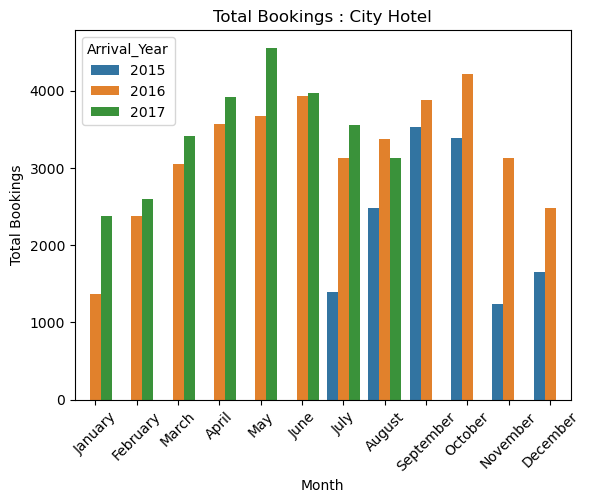

In [20]:
city52 = df52[df52['Hotel'] == 'City Hotel']

cityplot52 = sns.barplot(x='Arrival_Month',y='Total_B',hue='Arrival_Year',
            order = monthorder,data=city52)
plt.title('Total Bookings : City Hotel')
plt.xlabel('Month')
plt.ylabel('Total Bookings')
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

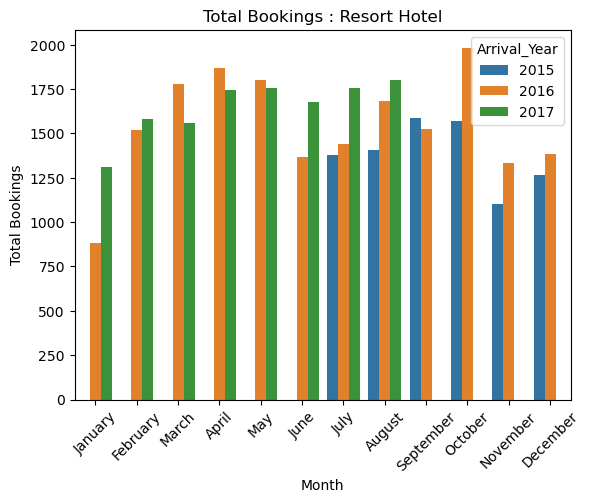

In [21]:
resort52 = df52[df52['Hotel'] == 'Resort Hotel']

resortplot52 = sns.barplot(x='Arrival_Month',y='Total_B',hue='Arrival_Year',
            order = monthorder,data=resort52)
plt.title('Total Bookings : Resort Hotel')
plt.xlabel('Month')
plt.ylabel('Total Bookings')
plt.xticks(rotation = 45)

Note : 
- The most booked month/year in City Hotel is May/2017
- The most booked month/year in Resort Hotel is October/2016
- January is the least popular month in both types of hotel. (Nov-Jan can be called lowseason.)
- The number of Resort Hotel bookings is around 50% smaller than City hotel.

In [22]:
# Find the number of canceled bookings by month
q53 =""" SELECT * , 
         ROUND(C1*100.0/Ctotal,2)
         FROM
         (SELECT arrival_date_month, COUNT(*) as Ctotal  
            FROM hotel_bookings GROUP BY arrival_date_month) t1 
          INNER JOIN
         (SELECT arrival_date_month, COUNT(*) as C1 
            FROM hotel_bookings WHERE is_canceled = '1' GROUP BY 
            arrival_date_month, is_canceled ) t2
         ON t1.arrival_date_month = t2.arrival_date_month
         ORDER BY ROUND( C1*100.0/Ctotal,2) DESC"""

In [23]:
data53 = cur.execute(q53)
data53 = cur.fetchall()

col53 = ['Arrival_Month','Total_B','Canceled_B','%ofTotal']
df53 = pd.DataFrame(data53)
df53 = df53.drop(2,axis=1)
df53.columns = col53
df53

,Arrival_Month,Total_B,Canceled_B,%ofTotal
0,June,10938,4535,41.46
1,April,11089,4524,40.80
2,May,11791,4677,39.67
3,September,10508,4116,39.17
4,October,11160,4246,38.05
5,August,13877,5239,37.75
6,July,12661,4742,37.45
7,December,6780,2371,34.97
8,February,8068,2696,33.42
9,March,9794,3149,32.15


Note :
- Maximum of canceled bookings is in August but The highest percentage of canceled bookings is in June.

In [24]:
# Find the most popular meal package
q6 = """SELECT COUNT(*),meal
        FROM hotel_bookings
        GROUP BY meal
        ORDER BY COUNT(*) DESC"""

In [25]:
data6 = cur.execute(q6)
data6 = cur.fetchall()

col6 = ['No_of_B','Meal']
df6 = pd.DataFrame(data6,columns=col6)
df6 

,No_of_B,Meal
0,92309,BB
1,14463,HB
2,10650,SC
3,1169,Undefined
4,798,FB


Note : Undefined/SC = no meal package, BB = Bed & Breakfast, HB = Half board – breakfast and one other meal and FB = Full board – breakfast, lunch and dinner
- BB (Bed & Breakfast) are selected the most.

In [26]:
# Find the number of bookings with meal package and without meal package
q61 = """SELECT  COUNT(*),
         SUM(CASE  WHEN meal  in ('BB', 'FB', 'HB') THEN 1 else 0 end),
         SUM(CASE WHEN meal in ( 'SC', 'Undefined') THEN 1 else 0 end)
         FROM hotel_bookings"""

In [27]:
data61 = cur.execute(q61)
data61 = cur.fetchall()

col61 = ['Total_B','With_Meal','Without_Meal']
df61 = pd.DataFrame(data61,columns=col61)
df61 

,Total_B,With_Meal,Without_Meal
0,119389,107570,11819


Note:
- Most of customer tend to select their bookings with meal package

In [28]:
q62 = """SELECT  COUNT(*), SUM(Children),
         SUM(CASE  WHEN meal = 'BB' or meal = 'FB' or  meal = 'HB' THEN 1 else 0 end),
         SUM(CASE WHEN meal = 'SC' or meal = 'Undefined' THEN 1 else 0 end)
         FROM hotel_bookings
         WHERE children = 0 and babies = 0
         UNION
         SELECT   COUNT(*), SUM(Children),
         SUM(CASE  WHEN meal = 'BB' or meal = 'FB' or  meal = 'HB' THEN 1 else 0 end),
         SUM(CASE WHEN meal = 'SC' or meal = 'Undefined'  THEN 1 else 0 end)
         FROM hotel_bookings
         WHERE  (children <> 0 or babies <> 0) or (children <> 0 AND babies <> 0)"""


In [29]:
data62 = cur.execute(q62)
data62 = cur.fetchall()

col62 = ['Total_B','Children','With_Meal','Without_Meal']
df62 = pd.DataFrame(data62,columns=col62)
df62

,Total_B,Children,With_Meal,Without_Meal
0,9336,12403.0,9087,249
1,110053,0.0,98483,11570


Note:
- The first row = adults with children / babies
- Most of customer are adults without children.
- The customer coming with children / babies tend to book with meal package (~97%)

In [30]:
# Find the number of repeated guests by hotel
q7 = """SELECT *,ROUND(C1*100.0/Ctotal,2)
         FROM
         (SELECT  hotel,COUNT(*) as Ctotal  
            FROM hotel_bookings GROUP BY  hotel) t1 
          INNER JOIN
         (SELECT  hotel, COUNT(*) as C1 
            FROM hotel_bookings WHERE is_repeated_guest = '1' GROUP BY 
            hotel, is_repeated_guest ) t2
         ON t1.hotel = t2.hotel"""

In [31]:
data7 = cur.execute(q7)
data7 = cur.fetchall()

col7 = ['Hotel','Total_B','Repeated_Guest','%ofTotal']
df7 = pd.DataFrame(data7)
df7 = df7.drop(2,axis=1)
df7.columns = col7
df7

,Hotel,Total_B,Repeated_Guest,%ofTotal
0,City Hotel,79330,2032,2.56
1,Resort Hotel,40059,1778,4.44


Note:
- The total number of guests in Resort Hotel is less than City Hotel but the percentage of repeated guests is higher.

In [32]:
# Find the market segment of guests by hotel
q8 = """SELECT hotel,market_segment,COUNT(*)
        FROM hotel_bookings
        GROUP BY hotel,market_segment"""

In [33]:
data8 = cur.execute(q8)
data8 = cur.fetchall()

col8 = ['Hotel','Segment','No_of_B']
df8 = pd.DataFrame(data8,columns=col8)
df8

,Hotel,Segment,No_of_B
0,City Hotel,Aviation,237
1,City Hotel,Complementary,542
2,City Hotel,Corporate,2986
3,City Hotel,Direct,6093
4,City Hotel,Groups,13975
5,City Hotel,Offline TA/TO,16747
6,City Hotel,Online TA,38748
7,City Hotel,Undefined,2
8,Resort Hotel,Complementary,201
9,Resort Hotel,Corporate,2309


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Aviation'),
  Text(1, 0, 'Complementary'),
  Text(2, 0, 'Corporate'),
  Text(3, 0, 'Direct'),
  Text(4, 0, 'Groups'),
  Text(5, 0, 'Offline TA/TO'),
  Text(6, 0, 'Online TA'),
  Text(7, 0, 'Undefined')])

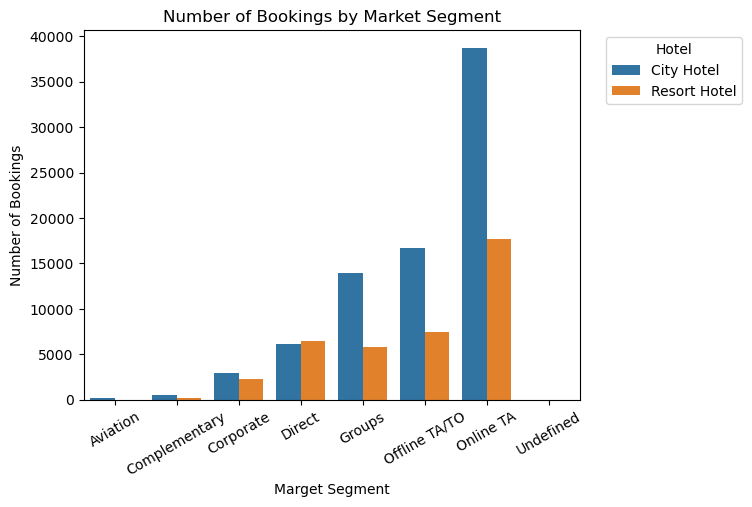

In [34]:
plot8 = sns.barplot(x='Segment',y='No_of_B',hue='Hotel', data=df8)
plt.title('Number of Bookings by Market Segment')
plt.xlabel('Marget Segment')
plt.ylabel('Number of Bookings')
plt.legend(title='Hotel', ncol=1,bbox_to_anchor=(1.04,1))
plt.xticks(rotation=30)

Note: TA = Travel Agents, TO = Tour Operators
- Most of guests come from Online TA in both hotels.
- Resort Hotel can get more direct guests than City Hotel.

In [37]:
# Find the number of booking in each room type
q9 = """SELECT  reserved_room_type, COUNT(*),hotel
        FROM hotel_bookings
        GROUP BY reserved_room_type,hotel"""

In [38]:
data9 = cur.execute(q9)
data9 = cur.fetchall()

col9 = ['Room_Type','No_of_B','Hotel']
df9 = pd.DataFrame(data9,columns=col9)
df9.head()

,Room_Type,No_of_B,Hotel
0,A,62595,City Hotel
1,A,23398,Resort Hotel
2,B,1115,City Hotel
3,B,3,Resort Hotel
4,C,14,City Hotel


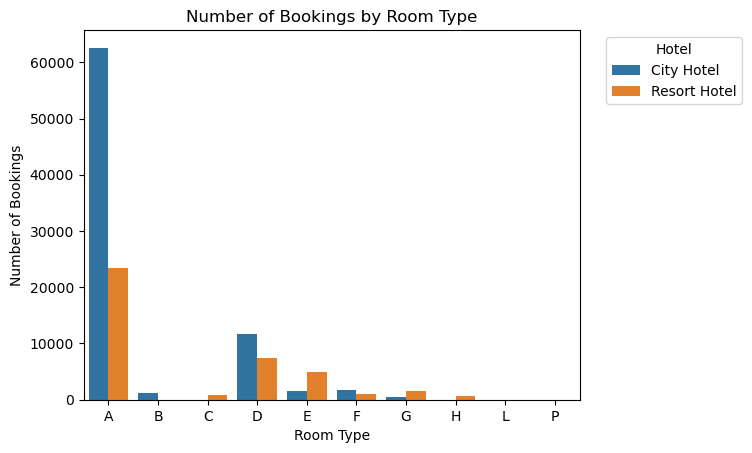

In [39]:
plot9 = sns.barplot(x='Room_Type',y='No_of_B',hue='Hotel', data=df9)
plt.title('Number of Bookings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Number of Bookings')
plt.legend(title='Hotel', ncol=1,bbox_to_anchor=(1.04,1))

Note :
- H & L Type are available in Resort Hotel only.
- Most of guests select type A room in both hotels.

In [40]:
# Find the number of bookings that their reserved rooms are changed by hotel
# Reserved room != Assigned room
q91 = """SELECT hotel,C,Ctotal, ROUND((C*100.00/Ctotal),2)
         FROM ( SELECT
                hotel,
	            SUM(CASE WHEN reserved_room_type != assigned_room_type  THEN 1 ELSE 0 END) AS C,
                COUNT(*) AS Ctotal
                FROM hotel_bookings
	            GROUP BY hotel)"""

In [41]:
data91 = cur.execute(q91)
data91 = cur.fetchall()

col91 = ['Hotel','Diff_Room','Total_B','%ofTotal']
df91 = pd.DataFrame(data91,columns=col91)
df91

,Hotel,Diff_Room,Total_B,%ofTotal
0,City Hotel,7192,79330,9.07
1,Resort Hotel,7724,40059,19.28


Note :
- Around 12% of guests that didn't get the same room type as they'd booked.
- The percentage of not getting the same room type in the Resort Hotel is around 10% higher than the City Hotel

In [42]:
# Find the number of days that elepsed between the booking date and arrival date
# Split into bins
q ="""SELECT SUM(C), Bins
      FROM (SELECT 
             CASE 
               WHEN D >= 0 and D <= 7 then  'Within a week'
               WHEN D > 7 and D <= 14 then 'Within 2 weeks'
               WHEN D > 14 and D <= 30 then 'Within a month'
               WHEN D > 30 and D <= 90 then 'Within 3 months'
               WHEN D > 90 and D <= 180 then 'Within 6 months'
               WHEN D > 180 and D <= 365 then 'Within a year'
               ELSE 'More than 1 year'
               END AS Bins,
               C
                 FROM (SELECT lead_time as D, COUNT(*) AS C
                       FROM hotel_bookings
                       GROUP BY lead_time))
      GROUP BY Bins
      ORDER BY SUM(C) DESC"""

In [43]:
data = cur.execute(q)
data = cur.fetchall()

col = ['No_of_B','Lead_Time']
df = pd.DataFrame(data,columns = col)
df

,No_of_B,Lead_Time
0,29553,Within 3 months
1,26439,Within 6 months
2,21544,Within a year
3,19745,Within a week
4,11934,Within a month
5,7026,Within 2 weeks
6,3148,More than 1 year


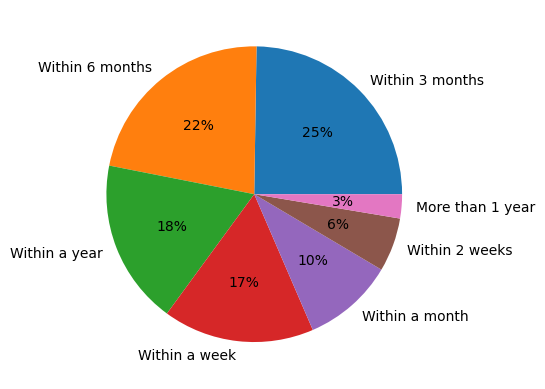

In [44]:
piecolors = sns.color_palette()[0:7]
plt.pie(df['No_of_B'], labels = df['Lead_Time'], 
        colors = piecolors, autopct='%.0f%%')
plt.show()

Note :
- Around 50% of guests booked the hotel 1-6 month(s) in advance (30 < Lead Time <= 180)

In [45]:
# Find the type of cancellation
q10 = """SELECT  reservation_status, COUNT(*)
       FROM hotel_bookings
       WHERE is_canceled = '1'
       GROUP BY reservation_status"""

In [46]:
data10 = cur.execute(q10)
data10 = cur.fetchall()

col10 = ['Type','No_of_B']
df10 = pd.DataFrame(data10,columns=col10)
df10

,Type,No_of_B
0,Canceled,43017
1,No-Show,1207


Note :
- Most of canceled bookings are informed in advance

## Summaries :
- The percentage of booking cancellations in both hotels is 37%, but the cancellation rate at City Hotel is higher.
- The percentaage of repeated guests in Resort Hotel is higher.
- The most booked month in both hotels is August, but I think it's because we have the most data for that month.
- November to January can be called the low season.
- In June, the percentage of booking cancellations is the highest. 
- The number of guests at City Hotel is higher than at Resort Hotel.
- Most of guests are adults who come without children.
- The most popular meal package is BB (Bed and breakfast).
- For those who visiting with children they tend to book a package that includes meals.
- Resort Hotel can attract more direct guests.
- Half of the guests book 1-6 month(s) in advance.
- Type A room is the most selected.
- Around 12% of guests stayed in the different room type than what they'd booked.